## Sujets-R5.A.12 - Modélisations mathématiques-2025-2026-ALT

# Chaînes de Markov et PageRank de Google

- Leonardo CORREIA-MENDES / Groupe 3A BUT3
- Diego PENICAUD-BERNAL / Groupe 3A BUT3
- Aidan CRISTINI / Groupe 3A BUT3

## Sommaire :

- Chaînes de Markov :
  - Définition mathématique d'une chaîne de Markov
  - Histoire et fondemenets des chaînes de Markov
  - Exemple de modèles de Markov observable & caché
    - Modèle de Markov observable
    - Modèle de Markov caché

- PageRank de Google :     
  - Définition mathématique PageRank
  - Foncionnements de l'algorithme PageRank
  - Exemples de l'algorithme PageRank



# Chaînes de Markov :

## Définition mathématique chaîne de Markov :

Une chaîne de Markov est un modèle mathématique, basé sur des graphes, utilisé pour représenter des systèmes dans lesquels l’état futur dépend uniquement de l’état actuel, et non des états passés. Dit autrement, toute l’information est contenue dans l’état présent. Pour prédire l’état suivant, il suffit de connaître le dernier état, sans se soucier de la séquence d’états antérieurs.


## Histoire et fondements des chaînes de Markov :

Les chaînes de Markov apparaissent en 1906 grâce au mathématicien russe Andreï Markov. L’idée ne naît pas dans le vide : Markov voulait répondre à une controverse avec son collègue Pavel Nekrasov. Celui-ci affirmait que la loi des grands nombres, un des résultats centraux de la théorie des probabilités, ne pouvait s’appliquer que si les variables étaient indépendantes. Markov s’oppose fermement à cette vision. Pour le contredire, il entreprend de montrer qu’il est possible d’obtenir les mêmes résultats sans indépendance stricte, à condition que les dépendances soient bien structurées.

 Il illustre son idée en analysant la suite des lettres dans un poème : Eugène Onéguine. Par ce travail, Markov réussit à démontrer que Nekrasov avait tort : l’indépendance n’est pas nécessaire pour obtenir des résultats probabilistes fondamentaux. Cette volonté de réfuter une idée reçue est directement à l’origine du concept de chaîne de Markov.

Au milieu du XXᵉ siècle, des probabilistes comme Doeblin et Feller précisent les théorèmes de convergence. Puis les chaînes de Markov deviennent un outil central en mathématiques appliquées, donnant naissance à des méthodes comme le Monte Carlo par chaînes de Markov (MCMC), utilisées en physique, statistique et informatique.



## Exemple de Modèle de Markov

### Modèle Markov observable :

Considérons la situation qui suit :
Vous êtes enfermés chez vous un jour de pluie, et vous aimeriez déterminer le temps qu’il fera lors des cinq prochains jours. mesure stationnaire
Comme vous n’êtes pas météorologue, vous vous simplifiez la tâche en faisant l’hypothèse que la météo suit un modèle de Markov: le temps qu’il fait au jour J dépend uniquement du temps qu’il fait au jour J-1.
Pour simplifier encore plus, vous considérez qu’il y a seulement trois temps possibles: soleil, nuages ou pluie.
En se basant sur les observations des derniers mois, vous établissez le diagramme de transitions suivant :

![test](img/meteo_markov.png)

La matrice de transition associée est la suivante :

![test](img/meteo_matrice.png)

Comme le temps d’un jour dépend uniquement du temps qu’il a fait la veille, il suffit de multiplier les probabilités (pour rappel il pleut aujourd’hui):

```
P (Soleil, Soleil, Pluie, Nuages, Nuages, Soleil | Pluie)
= P(Soleil | Pluie)P(Soleil | Soleil)P(Pluie | Soleil)P(Nuages | Pluie)P(Soleil | Nuages)
= 0,35 x 0,35 x 0,4 x 0,45 x 0,4
= 0,0088
```








### Modèle Markov caché :

Supposons maintenant qu’un psychopathe de la météo vous a enfermé dans une pièce sans fenêtre avec seulement un ordinateur et une lampe. Chaque jour, la lampe s’allume d’une certaine couleur en fonction de la météo. Votre kidnappeur vous fournit la matrice d’observation suivants :

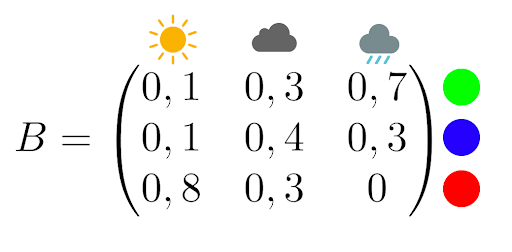


Par exemple s’il pleut, la lampe a 70% de chances d’être verte et 30% de chances d’être bleue.
Vous pourrez rentrer chez vous si vous déterminez le temps qu’il fera lors des cinq prochains jours uniquement en vous basant sur la couleur de la lampe. Vous construisez alors un modèle de Markov caché.
Vous restez enfermé 5 jours et vous relevez les couleurs suivantes:
   bleu, bleu, rouge, vert, rouge.
Vous vous souvenez qu’il pleuvait le jour précédant votre enfermement, vous pouvez donc rédiger un tableau montrant la combinaison qui a la plus forte probabilité d’être réalisée :




In [ ]:
# importation des librairies dont on va avoir besoin
import numpy as np
import pandas as pd

# création d'une fonction qui énumère toutes les combinaisons de taille k faites avec les chiffres entre 0 et n-1
def combinaisons(k, n):
    nombre_combinaisons = n**k
    combinaisons = []
    for combinaison in range(nombre_combinaisons):
        v = combinaison
        comb = []
        for j in range(k):
            comb.append(v%n)
            v = v//n
        combinaisons.append(comb)
    return combinaisons
combi = np.array(combinaisons(5,3)) # énumération des combinaisons de taille 5 composées de 0, 1 et 2. (on prendra 0->Soleil, 1->Nuages, 2->Pluie)

# matrice de transition
A = [[0.35, 0.4, 0.35],
     [0.25, 0.25, 0.45],
     [0.4, 0.35, 0.2]]
# matrice d'observation (Vert en col1 -> indice 0, Bleu en col2 -> indice 1, Rouge en col3 -> indice 2)
B = [[0.1, 0.3, 0.7],
     [0.1, 0.4, 0.3],
     [0.8, 0.3, 0.0]]

# observation Bleu, Bleu, Rouge, Vert, Rouge -> indices 1, 1, 2, 0, 2
# probabilité de réalisation des combinaisons
proba = np.zeros((len(combi), 1))
for ligne, suite in enumerate(combi):
    proba[ligne][0] = A[suite[0]][2]*B[1][suite[0]]\
                     *A[suite[1]][suite[0]]*B[1][suite[1]]\
                     *A[suite[2]][suite[1]]*B[2][suite[2]]\
                     *A[suite[3]][suite[2]]*B[0][suite[3]]\
                     *A[suite[4]][suite[3]]*B[2][suite[4]]\
                     *100                       # pour passer en %

# concaténation des combinaisons et de leur probabilité d'être réalisées en un dataframe
result = pd.DataFrame(np.concatenate([combi, proba], axis = 1), columns = ['J+1', 'J+2', 'J+3', 'J+4', 'J+5', 'Probabilité (%)'])

result[["J+1", "J+2", "J+3", "J+4", "J+5"]] = result[["J+1", "J+2", "J+3", "J+4", "J+5"]].replace([0, 1, 2], ["Soleil", "Nuages", "Pluie"])  # 0,1,2 deviennent respectivement Soleil,Nuages,Pluie
result.sort_values(by = ["Probabilité (%)"], axis = 0, ascending = False).head()  # affichage des 5 combinaisons les plus probables

,J+1,J+2,J+3,J+4,J+5,Probabilité (%)
58,Nuages,Nuages,Soleil,Pluie,Soleil,0.045158
61,Nuages,Pluie,Soleil,Pluie,Soleil,0.041489
59,Pluie,Nuages,Soleil,Pluie,Soleil,0.027095
139,Nuages,Nuages,Soleil,Pluie,Nuages,0.021773
142,Nuages,Pluie,Soleil,Pluie,Nuages,0.020004


# PageRank de Google

## Définition mathématique PageRank :

Le PageRank est un algorithme mathématique utilisé par Google pour évaluer l’importance des pages web. Sa formule de base, développée par Larry Page et Sergey Brin, repose sur des concepts de théorie des graphes et de probabilités, notamment les chaînes de Markov.

## Histoire et fondements du PageRank :

Le procédé de Pagerank de classement des pages web de Google est à l’origine du succès fulgurant du moteur de recherche le plus utilisé dans le monde.
Le Pagerank influence les résultats de recherche en réponse à une requête utilisateur en évaluant la pertinence thématique du contenu par rapport à la recherche de l’utilisateur.

Le procédé de Pagerank de classement des pages web de Google a été créé par deux jeunes étudiants de l’université de Stanford : Larry Page et Sergey Brin. En 1996, au cœur de la Silicon Valley, ces deux visionnaires cherchaient un moyen d’organiser les informations sur le web de manière plus intelligente. Le Pagerank, qui tire son nom de Larry Page, repose sur une idée simple mais brillante : toutes les pages web ne se valent pas, et leur importance dépend en grande partie des liens qu’elles reçoivent d’autres pages.  



## Fonctionnements de l’algorithme PageRank :


## Exemples de l’algorithme PageRank :


# note :

Une chaîne de Markov est un modèle mathématique qui décrit un système où l’évolution dépend uniquement de l’état actuel, pas du passé complet.

Exemple : 

Une lettre dans un poème russe peut être une voyelle ou une consonne. La probabilité d’avoir une voyelle à la lettre suivante dépend seulement de la lettre actuelle et non d’une lettre 3 pages avant 

Video : the strange math that predict (almost) anything

liens : BU / [perplexity](https://www.perplexity.ai/) / Arxiv [1](https://arxiv.org/abs/2509.04979) - [2](https://arxiv.org/abs/2508.01257) - [3](https://arxiv.org/abs/2506.18356) /  [Wikipédia](https://fr.wikipedia.org/wiki/PageRank#:~:text=Le%20PageRank%20est%20alors%20simplement,ou%20d%C3%A9connexion%20de%20serveur%20web%E2%80%A6))

[article-pagerank](https://univ-scholarvox-com.gorgone.univ-toulouse.fr/book/45004294)   [article-pagerank2](https://www-jstor-org.gorgone.univ-toulouse.fr/stable/24778735?sid=primo&seq=1)  [pdf-iut](https://webetud.iut-blagnac.fr/pluginfile.php/58101/mod_resource/content/0/S4-graphes-avances.pdf)

Source histoire : 

*[1](https://perso.math.univ-toulouse.fr/ktanguy/files/2020/03/Chapitre-8-Chaines-de-Markov.pdf#:~:text=terminologie%20provient%20du%20math%C3%A9maticien%20russe,L%E2%80%99histoire%20montre%20que)

[2](https://en.wikipedia.org/wiki/Markov_chain#:~:text=was%20interested%20in%20studying%20an,central%20limit%20theorem%20for%20such)

[3](https://www.tangente-mag.com/article.php?id=4436#:~:text=ImageC%E2%80%99est%20cette%20observation%20qui%20a,d%C3%A9crire%20un%20syst%C3%A8me%20en%20%C3%A9volution)

[4](https://datascientest.com/chaine-de-markov#:~:text=essentielles%20%3A)

[5](https://www.imo.universite-paris-saclay.fr/~pierre-loic.meliot/agreg/markov.pdf#:~:text=,donc%20r%C3%A9currents%20et%20visit%C3%A9s%20une)

prof : 
- definir matrice transition 
- theoremen de chapman korlogorof
- mesure stationnaire deplacement de population
- graph probabiliste devoir calculer le systeme au bout de x cycle